# Data Analysis for TM16 postsynaptic partners
checking specially for LC10, LC11

In [40]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind

In [59]:
# load excel file
path = r'D:\connectomics_post\post_to_tm16_with_labels_left_lobe.csv' # set your working path 
tm16_post_data= pd.read_csv(path)

In [60]:
tm16_post_data.presynaptic_ID.unique()

array([720575940616595980, 720575940622207514, 720575940623438813,
       720575940624003592, 720575940626803714, 720575940628806659,
       720575940630104064, 720575940630528512, 720575940631683087],
      dtype=int64)

In [61]:
# here i change my df to have an extra column with first 3 letters 
# and change the Tm16s with letters
mapping = {
720575940616595980: 'A',
720575940622207514: 'B',
720575940623438813: 'C',
720575940624003592: 'D',
720575940626803714: 'E',
720575940628806659: 'F',
720575940630104064: 'G',
720575940630528512: 'H',
720575940631683087: 'I',
}
#sorted['postsynaptic_ID'] = sorted['postsynaptic_ID'].map(mapping)
tm16_post_data['presynaptic_ID'] = tm16_post_data['presynaptic_ID'].map(mapping)

# Define a function to extract the first three letters
def extract_first_three_letters(text):
    if isinstance(text, str):
        return text[:4]
    else:
        return ''

# Apply the function to create the new column
tm16_post_data['labels'] = tm16_post_data['Cell_types'].apply(lambda x: extract_first_three_letters(x))




In [62]:
tm16_post_data

,postsynaptic_ID,counts,presynaptic_ID,Cell_types,labels
0,720575940622137101,39,A,NaN,
1,720575940613297066,25,A,NaN,
2,720575940635198565,17,A,NaN,
3,720575940624962035,16,A,NaN,
4,720575940631870824,16,A,NaN,
...,...,...,...,...,...
1959,720575940619870622,3,I,"LC16/6_R-like, targets optic glomerulus of lob...",LC16
1960,720575940592451178,3,I,NaN,
1961,720575940605906102,3,I,NaN,
1962,720575940611600819,3,I,NaN,


In [77]:
tm16_post_data.counts.min()

3

In [87]:
# exclude the unidentified neurons
def heatmap(data_tm9):
    unique_partners = data_tm9['labels'].value_counts()
    sorted_data = data_tm9.sort_values(by='labels', key=lambda x: x.map(unique_partners), ascending=False)
    
    sorted_neurons = sorted_data['labels'].unique()
    
    data = sorted_data.pivot_table(index="presynaptic_ID", columns="labels", values="counts", aggfunc='sum')
    sorted_neurons = [name for name in sorted_neurons if name in data.columns]
    data = data[sorted_neurons]
    
    max_count = data_tm9.counts.max()  # Get the maximum value from 'counts' in the pivot table
    
    # Exclude the first column from the heatmap
    excluded_column = data.columns[0]
    data_without_first_column = data.drop(columns=excluded_column)
    
    ax = sns.heatmap(data_without_first_column, cmap=sns.cm.rocket_r, xticklabels=True, vmax=max_count)
    
    plt.xticks(ticks=range(len(sorted_neurons)-1), labels=sorted_neurons[1:], rotation=90)  # Exclude the first label

    print(sorted_neurons)
    return ax


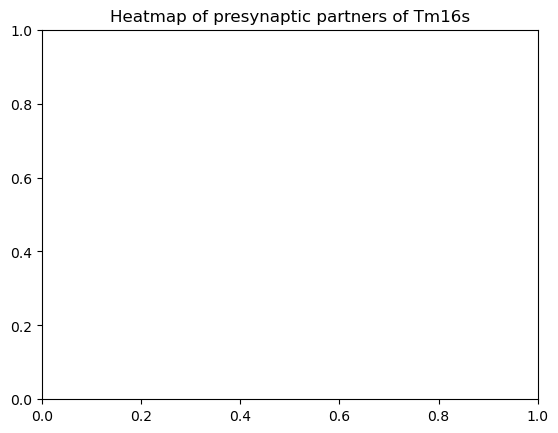

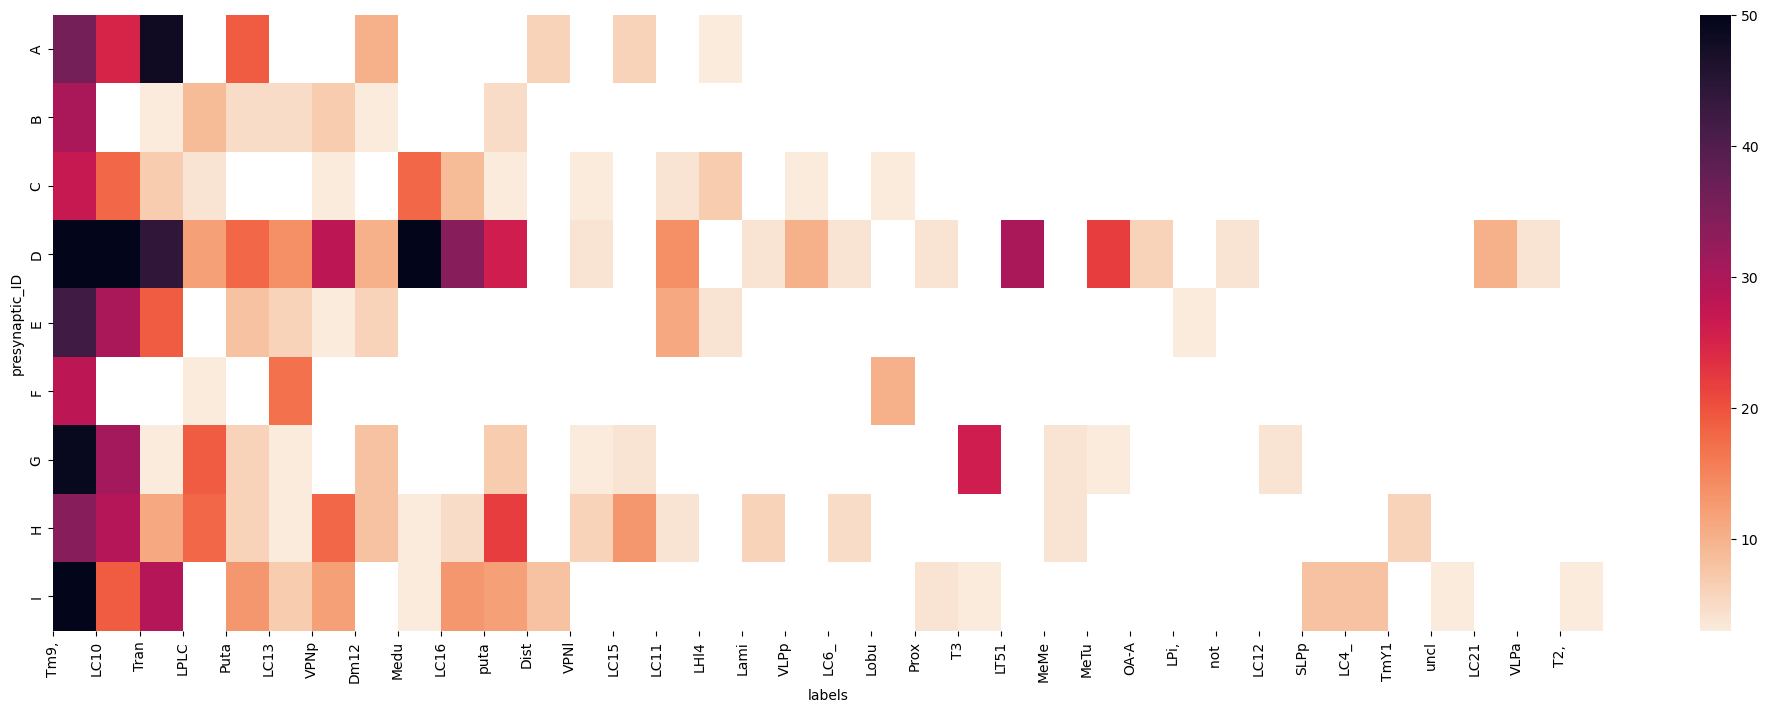

['', 'Tm9,', 'LC10', 'Tran', 'LPLC', 'Puta', 'LC13', 'VPNp', 'Dm12', 'Medu', 'LC16', 'puta', 'Dist', 'VPNl', 'LC15', 'LC11', 'LHl4', 'Lami', 'VLPp', 'LC6_', 'Lobu', 'Prox', 'T3', 'LT51', 'MeMe', 'MeTu', 'OA-A', 'LPi,', 'not ', 'LC12', 'SLPp', 'LC4_', 'TmY1', 'uncl', 'LC21', 'VLPa', 'T2, ']


In [86]:
plt.title('Heatmap of postsynaptic partners of Tm16s')
plt.figure(figsize = (25,8))
fig = heatmap(tm16_post_data)
figure = fig.get_figure()    
figure.savefig('Heatmap of postsynaptic partners of Tm16s.png')
plt.show()

In [29]:
# old one that works
def heatmap(data_tm9):
    unique_partners= data_tm9['postsynaptic_ID'].value_counts()
    sorted = data_tm9.sort_values(by ='postsynaptic_ID' , key = lambda x: x.map(unique_partners), ascending=False) 


    sorted_neurons = sorted['postsynaptic_ID'].unique()
    
    data = sorted.pivot_table(index = "presynaptic_ID", columns = "postsynaptic_ID", values = "counts",  aggfunc='sum')
    sorted_neurons = [name for name in sorted_neurons if name in data.columns]
    data = data[sorted_neurons]
    ax = sns.heatmap(data, cmap = sns.cm.rocket_r, xticklabels=True)
    plt.xticks(ticks = range(len(sorted_neurons)), labels = sorted_neurons, rotation = 90) # with this I dictate the order of the x labels appearance
    #plt.yticks(ticks = range(len(data.index)), labels = data.index, rotation = 0) 
    #plt.title("Tm9s with their Presynaptic Partners based on synapse strength")
    plt.show()
    print(sorted_neurons)
    #write function for this? lol
    return(ax)